In [1]:
#import data loading and processing modules
import numpy as np
import pandas as pd
from collections import defaultdict, Counter
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats

%matplotlib inline

In [2]:
#load datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
#nan values count
def nan_count(df):
    counts = df.isna().sum()
    indexing = []
    for idx in range(len(counts)):
        if counts[idx] > 0:
            indexing.append(idx)
    return counts[indexing]

In [5]:
#see unique values in each column
def unique_count(df):
    output = dict()
    classes = defaultdict(int)
    for col in df.columns:
        output[col] = len(df[col].unique())
    for val in output.values():
        if val <= 20:
            classes['few'] += 1
        elif val <= 50:
            classes['medium'] += 1
        else:
            classes['many'] += 1
    return output, classes

In [6]:
corr_table = train_df.corr()
corr_table

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [7]:
def print_scatters(df_in, cols, against):   
    plt.figure(1)
    # sets the number of figure row (ie: for 10 variables, we need 5, for 9 we 
    # need 5 as well)
    rows = math.ceil(len(cols)/2)
    f, axarr = plt.subplots(rows, 2, figsize=(10, rows*3))
    # for each variable you inputted, plot it against the dependant
    for col in cols:
        ind = cols.index(col)
        i = math.floor(ind/2)
        j = 0 if ind % 2 == 0 else 1
        if col != against:
            sns.regplot(data = df_in, x=col, y=against, fit_reg=False, ax=axarr[i,j])
        else:
            sns.distplot(a = df_in[col], ax=axarr[i,j])
        axarr[i, j].set_title(col)
    f.text(-0.01, 0.5, against, va='center', rotation='vertical', fontsize = 12)
    plt.tight_layout()
    plt.show()
    plt.gcf().clear()

In [8]:
top_feats = list(corr_table.columns[list(corr_table['SalePrice'] > 0.6)])[:-1]
top_feats

['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageCars',
 'GarageArea']

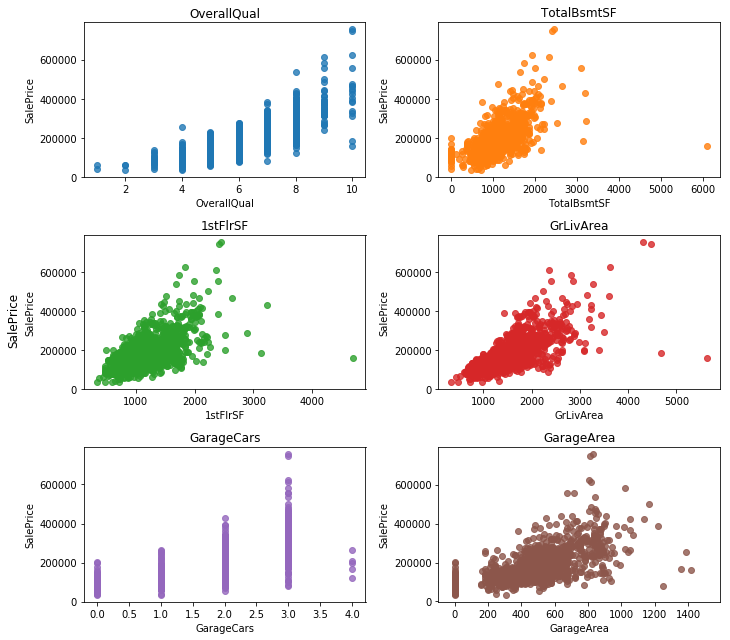

In [9]:
print_scatters(train_df, top_feats, against = 'SalePrice')

For the features with correlation greater than 0.6, I can easily see there are 1 outlier in TotalBsmtSF, 1 in 1stFirSF, and 2 in GrLivArea. I would like to see the distribution of test data to decide whether to remove the outlier or not.

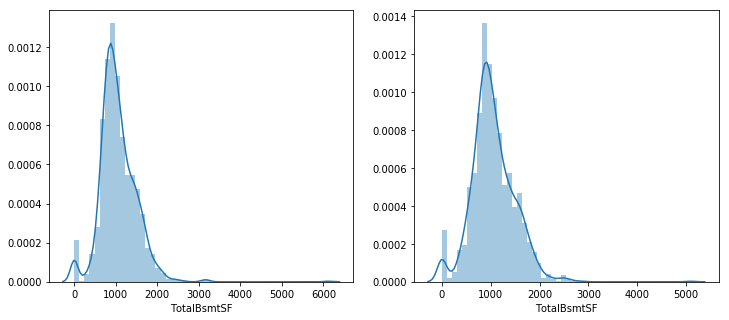

In [10]:
def show_dist(train_df, test_df, col):
    f, axes = plt.subplots(1,2, figsize = (12, 5))
    sns.distplot(train_df[col], ax = axes[0])
    test_df[col] = test_df[col].fillna(test_df[col].median())
    sns.distplot(test_df[col], ax = axes[1])
    
show_dist(train_df, test_df, col = 'TotalBsmtSF')

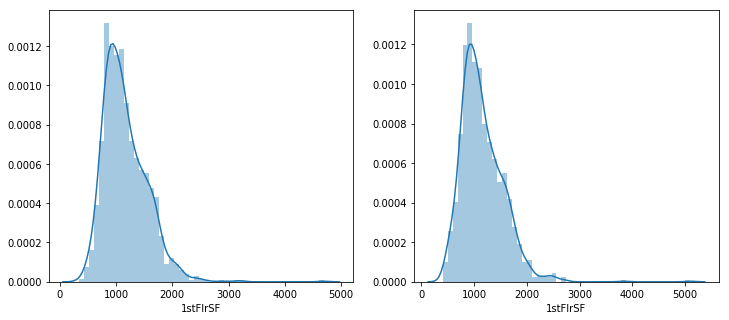

In [11]:
show_dist(train_df, test_df, col = '1stFlrSF')

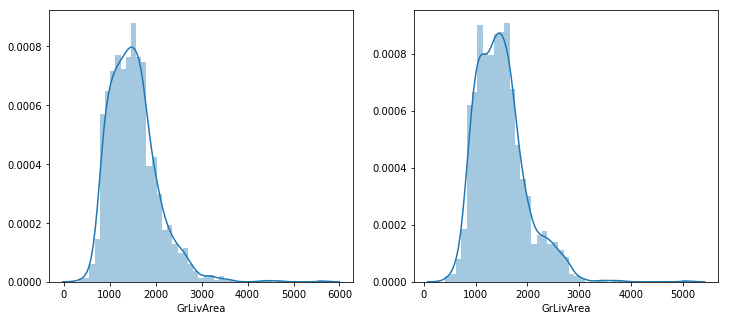

In [12]:
show_dist(train_df, test_df, col = 'GrLivArea')

Now I can see that, actually there are few outliers in both training and test datasets. But since the prediction is to find the most possible predictions and the outliers might have strong impact when applying statistics methods to the regression model. So I might still get rid of the outliers to make sure the prediction of the non-outliers are unbiased.

### 0. fast implementation and see how it works

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

/Users/KunWuYao/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
#pick columns that are not categorical
def pick_num_cols(df):
    num_cols = df.select_dtypes(include = ['number'])
    return num_cols.columns
num_cols = pick_num_cols(train_df)
#num_cols

#fill up NaN values
train_num = train_df.copy()
train_num = train_num[num_cols]
train_num.fillna(train_num.median(), inplace = True)
#train_num.isna().sum()
len(train_num.columns)

57

In [22]:
#fit and see the score (RF)
rf_regress = RandomForestRegressor(n_jobs = -1)
params = {'max_depth': [20,30,40], 'n_estimators': [500], 'max_features': [10,20,30,36]}
gsCV = GridSearchCV(estimator = rf_regress, param_grid = params, cv = 5, n_jobs = -1, verbose = 3)
gsCV.fit(train_num.drop(['SalePrice', 'Id'],axis = 1),train_num['SalePrice'])
print(gsCV.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_features=10, n_estimators=500, max_depth=20 .................
[CV] max_features=10, n_estimators=500, max_depth=20 .................
[CV] max_features=10, n_estimators=500, max_depth=20 .................
[CV] max_features=10, n_estimators=500, max_depth=20 .................
[CV]  max_features=10, n_estimators=500, max_depth=20, score=0.8346254772251138, total=   3.8s
[CV]  max_features=10, n_estimators=500, max_depth=20, score=0.8835970692389634, total=   3.8s
[CV] max_features=10, n_estimators=500, max_depth=20 .................
[CV] max_features=20, n_estimators=500, max_depth=20 .................
[CV]  max_features=10, n_estimators=500, max_depth=20, score=0.8778385918176954, total=   4.4s
[CV]  max_features=10, n_estimators=500, max_depth=20, score=0.8940179469924426, total=   4.3s
[CV] max_features=20, n_estimators=500, max_depth=20 .................
[CV] max_features=20, n_estimators=500, max_depth=20 .........

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   40.5s


[CV]  max_features=10, n_estimators=500, max_depth=30, score=0.8385708805191819, total=   4.0s
[CV] max_features=20, n_estimators=500, max_depth=30 .................
[CV]  max_features=20, n_estimators=500, max_depth=30, score=0.8765933174765255, total=   5.5s
[CV] max_features=20, n_estimators=500, max_depth=30 .................
[CV]  max_features=20, n_estimators=500, max_depth=30, score=0.8333820217592217, total=   5.8s
[CV] max_features=30, n_estimators=500, max_depth=30 .................
[CV]  max_features=20, n_estimators=500, max_depth=30, score=0.8778158548399015, total=   6.1s
[CV] max_features=30, n_estimators=500, max_depth=30 .................
[CV]  max_features=20, n_estimators=500, max_depth=30, score=0.8895688986302197, total=   5.9s
[CV] max_features=30, n_estimators=500, max_depth=30 .................
[CV]  max_features=20, n_estimators=500, max_depth=30, score=0.8246563061860764, total=   5.9s
[CV] max_features=30, n_estimators=500, max_depth=30 .................
[CV]

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.7min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [23]:
rf_regress = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
cv_score = cross_val_score(rf_regress, train_num.drop(['SalePrice','Id'], axis = 1), 
                           train_num['SalePrice'], cv = 5, n_jobs = -1)
print('CV Score is: '+ str(np.mean(cv_score)))

CV Score is: 0.8635429969173142


In [25]:
#baseline
rf_regress.fit(train_num.drop(['SalePrice','Id'], axis = 1), 
                           train_num['SalePrice'])
test_num = test_df.copy()
test_num['SalePrice'] = 0
test_num = test_num[num_cols]
test_num.fillna(train_num.median(), inplace = True)
pred = rf_regress.predict(test_num.drop(['SalePrice', 'Id'], axis = 1))

In [27]:
sub = pd.DataFrame()
sub['Id'] = test_num['Id']
sub['SalePrice'] = pred
sub.to_csv('try_1.csv', index = False)
#baseline: 0.14945

### 1. remove outliers in training set

In [14]:
def remove_outliers(df):
    out1 = df['TotalBsmtSF'] > 4000
    out2 = df['1stFlrSF'] > 4000
    out3 = df['GrLivArea'] >4500
    return df.drop(df.index[out1 | out2 | out3], axis = 0)
train_df = remove_outliers(train_df)
len(train_df) #original 1460 samples

1458

In [29]:
#fill up NaN values
train_num = train_df.copy()
train_num = train_num[num_cols]
train_num.fillna(train_num.median(), inplace = True)
#train_num.isna().sum()

rf_regress.fit(train_num.drop(['SalePrice','Id'], axis = 1), 
                           train_num['SalePrice'])
test_num = test_df.copy()
test_num['SalePrice'] = 0
test_num = test_num[num_cols]
test_num.fillna(train_num.median(), inplace = True)
pred = rf_regress.predict(test_num.drop(['SalePrice', 'Id'], axis = 1))

sub = pd.DataFrame()
sub['Id'] = test_num['Id']
sub['SalePrice'] = pred
sub.to_csv('try_2.csv', index = False)
#slightly improved: 0.14927

Based on data_description.txt, we might find some categorical data can be converted into numeric, and some numeric data has no direct relationships between the numbers and the label SalePrice.

### 2. Categorical to numeric
Some categorical columns but can be measured by numbers:
    
    1. Fence (GdPrv)
    2. PoolQC (TA) V
    3. PavedDrive (Y/P/N)
    4. GarageCond (TA) V
    5. GarageQual (TA) V
    6. GarageFinish (Fin)
    8. FireplaceQu (TA) V
    9. Functional (Typ)
    10. KitchenQual (TA) V
    11. HeatingQC (TA) V
    12. BsmtFinType2 (GLQ)
    13. BsmtFinType1 (GLQ)
    14. BsmtExposure (Gd)
    15. BsmtCond (TA) V
    16. BsmtQual (TA) V
    17. ExterCond (TA) V
    18. ExterQual (TA) V
    19. LandSlope (Gtl)
    20. Utilities (AllPub)
    22. LotShape (Reg)

#### 2.1 Categorical to numeric (quality initials => numbers)

In [15]:
def qual_to_num(df):
    dict_num = {'NA': 0, 
                'Po': 1,
                'Fa': 2,
                'TA': 3,
                'Gd': 4,
                'Ex': 5,
                }
    qual_cols = ['PoolQC', 'GarageCond', 'GarageQual', 'FireplaceQu', 'KitchenQual', 
                'BsmtCond', 'HeatingQC', 'BsmtQual', 'ExterCond', 'ExterQual']
    for col in qual_cols:
        df[col] = df[col].map(dict_num)
        df[col] = df[col].astype('float') #Since there are still nan values unreplaced
    return df
train_df = qual_to_num(train_df)

#### 2.2 Categorical to numeric (various quality labels => numbers)

In [16]:
def qual_2_num(df):
    qual_cols = ['Fence', 'PavedDrive', 'GarageFinish', 'Functional', 'BsmtFinType2', 
                 'BsmtFinType1', 'BsmtExposure', 'LandSlope', 'Utilities', 'LotShape']
    dict_num = dict()
    dict_num['Fence'] = {'NA': 0,
                         'MnWw': 1,
                         'GdWo': 2,
                         'MnPrv': 3,
                         'GdPrv': 4}
    #PaveDrive would be NaN if the house doesn't have a garage.
    dict_num['PavedDrive'] = {'N': 1,
                              'P': 2,
                              'Y': 3}
    dict_num['GarageFinish'] = {'NA': 0,
                               'Unf': 1,
                               'RFn': 2,
                               'Fin': 3}
    dict_num['Functional'] = {'Sal': 0,
                             'Sev': 1,
                             'Maj2': 2,
                             'Maj1': 3,
                             'Mod': 4,
                             'Min2': 5,
                             'Min1': 6,
                             'Typ': 7}
    dict_num['BsmtFinType2'] = {'NA': 0,
                               'Unf': 1,
                               'LwQ': 2,
                               'Rec': 3,
                               'BLQ': 4,
                               'ALQ': 5,
                               'GLQ': 6}
    dict_num['BsmtFinType1'] = dict_num['BsmtFinType2']
    dict_num['BsmtExposure'] = {'NA': 0,
                               'No': 1,
                               'Mn': 2,
                               'Av': 3,
                               'Gd': 4}
    dict_num['LandSlope'] = {'Sev': 0,
                            'Mod': 1,
                            'Gtl': 2}
    dict_num['Utilities'] = {'ELO': 0,
                            'NoSeWa': 1,
                            'NoSewr': 2,
                            'AllPub': 3}
    dict_num['LotShape'] = {'IR3': 0,
                           'IR2': 1,
                           'IR1': 2,
                           'Reg': 3}
    for col in qual_cols:
        df[col] = df[col].map(dict_num[col])
        df[col] = df[col].astype('float') #Since there are still nan values unreplaced
    return df

train_df = qual_2_num(train_df)

In [17]:
corr_table = train_df.corr()
top_feats = list(corr_table.columns[list(corr_table['SalePrice'] > 0.6)])[:-1]
top_feats

['OverallQual',
 'ExterQual',
 'BsmtQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'KitchenQual',
 'GarageCars',
 'GarageArea']

After the conversion, I have 3 more features with high correlation with the label SalePrice! That's pretty good.

In [19]:
num_cols = pick_num_cols(train_df)

#fill up NaN values
train_num = train_df.copy()
train_num = train_num[num_cols]
train_num.fillna(train_num.median(), inplace = True)
#train_num.isna().sum()
len(train_num.columns)

58

In [34]:
#fit and see the score (RF)
rf_regress = RandomForestRegressor(n_jobs = -1)
params = {'max_depth': [20,30,40], 'n_estimators': [500], 'max_features': [10,20,30,40]}
gsCV = GridSearchCV(estimator = rf_regress, param_grid = params, cv = 5, n_jobs = -1, verbose = 3)
gsCV.fit(train_num.drop(['SalePrice', 'Id'],axis = 1),train_num['SalePrice'])
print(gsCV.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_features=10, n_estimators=500, max_depth=20 .................
[CV] max_features=10, n_estimators=500, max_depth=20 .................
[CV] max_features=10, n_estimators=500, max_depth=20 .................
[CV] max_features=10, n_estimators=500, max_depth=20 .................
[CV]  max_features=10, n_estimators=500, max_depth=20, score=0.900909751737643, total=   6.0s
[CV] max_features=10, n_estimators=500, max_depth=20 .................
[CV]  max_features=10, n_estimators=500, max_depth=20, score=0.9037575897509604, total=   6.3s
[CV]  max_features=10, n_estimators=500, max_depth=20, score=0.8791143747663113, total=   6.3s
[CV] max_features=20, n_estimators=500, max_depth=20 .................
[CV]  max_features=10, n_estimators=500, max_depth=20, score=0.8998130813014027, total=   6.3s
[CV] max_features=20, n_estimators=500, max_depth=20 .................
[CV] max_features=20, n_estimators=500, max_depth=20 ..........

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min


[CV]  max_features=10, n_estimators=500, max_depth=30, score=0.8880187042037451, total=   6.1s
[CV] max_features=20, n_estimators=500, max_depth=30 .................
[CV]  max_features=20, n_estimators=500, max_depth=30, score=0.8997734507053549, total=   7.2s
[CV] max_features=20, n_estimators=500, max_depth=30 .................
[CV]  max_features=20, n_estimators=500, max_depth=30, score=0.9118930531190792, total=   7.9s
[CV] max_features=30, n_estimators=500, max_depth=30 .................
[CV]  max_features=20, n_estimators=500, max_depth=30, score=0.8794611842818206, total=   7.9s
[CV] max_features=30, n_estimators=500, max_depth=30 .................
[CV]  max_features=20, n_estimators=500, max_depth=30, score=0.9011901703237389, total=   8.4s
[CV] max_features=30, n_estimators=500, max_depth=30 .................
[CV]  max_features=20, n_estimators=500, max_depth=30, score=0.8916392462058136, total=   8.2s
[CV] max_features=30, n_estimators=500, max_depth=30 .................
[CV]

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.7min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
           max_features=20, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [36]:
rf_regress = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
           max_features=20, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

rf_regress.fit(train_num.drop(['SalePrice','Id'], axis = 1), 
                           train_num['SalePrice'])
test_num = test_df.copy()
test_num = qual_to_num(test_num)
test_num = qual_2_num(test_num)
test_num['SalePrice'] = 0
test_num = test_num[num_cols]
test_num.fillna(train_num.median(), inplace = True)
pred = rf_regress.predict(test_num.drop(['SalePrice', 'Id'], axis = 1))

sub = pd.DataFrame()
sub['Id'] = test_num['Id']
sub['SalePrice'] = pred
sub.to_csv('try_3.csv', index = False)
#slightly improved: 0.14622

### 3. Numeric to categorical

In [18]:
#MSSubClass is actually categorical data
def to_categorical(df, numeric_col):
    df[numeric_col] = df[numeric_col].astype('category')
    return df

train_df = to_categorical(train_df, 'MSSubClass')

## 4. Deal with NaN values

In [19]:
nan_count(train_df)

LotFrontage      259
Alley           1367
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1452
Fence           1177
MiscFeature     1404
dtype: int64

In [20]:
gb_neigh_LF = train_df['LotFrontage'].groupby(train_df['Neighborhood'])
lotFoot = dict()
for key,group in gb_neigh_LF:
    # find where we are both simultaneously missing values and where the key exists
    lot_f_nulls_nei = train_df['LotFrontage'].isnull() & (train_df['Neighborhood'] == key)
    # fill in those blanks with the median of the key's group object
    train_df.loc[lot_f_nulls_nei,'LotFrontage'] = group.median()
    lotFoot[key] = group.median()

In [21]:
def deal_nan_val(df, base = train_df):
    targets = ['BsmtFinSF1', 'GarageArea', 'PoolArea', 'Fireplaces']
    for target in targets:
        df[target] = df[target].astype('float')
        df[target].fillna(0) #only one in test set (#660, most columns of basement related are NaN as well)
        ref_cols = [col for col in df.columns if col[:4] == target[:4]]
        ref_cols.remove(target)
        #set to 0(as 'NA') else median
        df.loc[df[target] == 0, ref_cols] = 0.
        if target == 'BsmtFinSF1':
            df.loc[df['BsmtFinSF2'] == 0, ['BsmtFinType2']] = 0.
            
    #fill 'None' into object/categorical data
    obj_cols = df.columns[df.dtypes == 'object']
    df[obj_cols] = df[obj_cols].fillna('None')
    #fill df.median into int/float data
    df = df.fillna(base.median())
    return df #note there might be NaN values after this.

train_df = deal_nan_val(train_df)

After checking the data description, I find that columns related to basement and garage are related to 'BsmtFinSF1', 'PoolArea', 'Fireplaces', and 'GarageArea', since every item of basement-related should be NaN or 0 if the square feet of the basement is 0, and same to the garage, the fireplace, and the pool. 

In [22]:
nan_count(train_df)

Series([], dtype: int64)

Done NaN values replacement!

### 5. One-hot-encoding (get_dummies) and regression

Since applying one-hot-encoding might not improve the final output and make the model overfitting, I would like to copy the original dataset and see how I can make things better with different one-hot-encoding implementation.

In [25]:
train_num = pd.get_dummies(train_df)
num_cols = pick_num_cols(train_num)
len(num_cols)

241

In [45]:
rf_regress = RandomForestRegressor(n_jobs = -1)
params = {'max_depth': [20,30,40], 'n_estimators': [500], 'max_features': [20, 40, 60, 100, 140]}
gsCV = GridSearchCV(estimator = rf_regress, param_grid = params, cv = 5, n_jobs = -1, verbose = 3)
gsCV.fit(train_num.drop(['SalePrice', 'Id'],axis = 1),train_num['SalePrice'])
print(gsCV.best_estimator_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] max_features=20, n_estimators=500, max_depth=20 .................
[CV] max_features=20, n_estimators=500, max_depth=20 .................
[CV] max_features=20, n_estimators=500, max_depth=20 .................
[CV] max_features=20, n_estimators=500, max_depth=20 .................
[CV]  max_features=20, n_estimators=500, max_depth=20, score=0.893752130981083, total=   4.0s
[CV] max_features=20, n_estimators=500, max_depth=20 .................
[CV]  max_features=20, n_estimators=500, max_depth=20, score=0.8592496415725784, total=   4.0s
[CV] max_features=40, n_estimators=500, max_depth=20 .................
[CV]  max_features=20, n_estimators=500, max_depth=20, score=0.8958805818163731, total=   4.1s
[CV] max_features=40, n_estimators=500, max_depth=20 .................
[CV]  max_features=20, n_estimators=500, max_depth=20, score=0.894566535634176, total=   4.1s
[CV] max_features=40, n_estimators=500, max_depth=20 ...........

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   49.8s


[CV]  max_features=20, n_estimators=500, max_depth=30, score=0.8948999974199687, total=   4.7s
[CV] max_features=20, n_estimators=500, max_depth=30 .................
[CV]  max_features=20, n_estimators=500, max_depth=30, score=0.8971233874399451, total=   4.8s
[CV] max_features=20, n_estimators=500, max_depth=30 .................
[CV]  max_features=20, n_estimators=500, max_depth=30, score=0.8629734929464219, total=   4.8s
[CV] max_features=40, n_estimators=500, max_depth=30 .................
[CV]  max_features=140, n_estimators=500, max_depth=20, score=0.8884258554390507, total=  10.6s
[CV] max_features=40, n_estimators=500, max_depth=30 .................
[CV]  max_features=20, n_estimators=500, max_depth=30, score=0.8961622976203835, total=   4.6s
[CV] max_features=40, n_estimators=500, max_depth=30 .................
[CV]  max_features=20, n_estimators=500, max_depth=30, score=0.8703552682143227, total=   4.4s
[CV] max_features=40, n_estimators=500, max_depth=30 .................
[CV

[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  2.6min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features=100, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [27]:
rf_regress = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features=100, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=225, verbose=0, warm_start=False)
cv_score = cross_val_score(rf_regress, train_num.drop(['SalePrice', 'Id'], axis = 1), 
                           train_num['SalePrice'], cv = 5, n_jobs = -1)
print('CV Score is: '+ str(np.mean(cv_score)))

CV Score is: 0.8975940643895142


In [28]:
rf_regress.fit(train_num.drop(['SalePrice','Id'], axis = 1), 
                           train_num['SalePrice'])
test_num = test_df.copy()
test_num = qual_to_num(test_num)
test_num = qual_2_num(test_num)
test_num['SalePrice'] = 0
test_num = to_categorical(test_num, 'MSSubClass')
for col in test_num['Neighborhood'].unique():
    test_num.loc[(test_num['Neighborhood'] == col) & (test_num['LotFrontage'].isnull()), 
                 ['LotFrontage']] = lotFoot[col]

In [29]:
test_num = deal_nan_val(test_num, base = train_df)
test_num = pd.get_dummies(test_num)
for col in train_df.columns:
    try:
        test_num[col]
    except:
        test_num[col] = 0

test_num = test_num[num_cols]
test_num.fillna(train_num.median(), inplace = True)

len(test_num.columns)

241

In [30]:
pred = rf_regress.predict(test_num.drop(['SalePrice', 'Id'], axis = 1))

sub = pd.DataFrame()
sub['Id'] = test_num['Id']
sub['SalePrice'] = pred
sub.to_csv('try_4.csv', index = False)
#slightly improved again: 0.14462

### 6. Different Algorithms

Let's try XGBoost and Lasso as well!

In [31]:
xgb_test = XGBRegressor()
params = {'learning_rate': [0.01, 0.03, 0.1, 0.3], 'n_estimators': [500], 'max_depth': [3, 5, 7],
         'colsample_bytree': [0.4]}
gsCV = GridSearchCV(estimator = xgb_test, param_grid = params, cv = 5, n_jobs = -1, verbose = 3)
gsCV.fit(train_num.drop(['SalePrice', 'Id'],axis = 1),train_num['SalePrice'])

print(gsCV.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] learning_rate=0.01, n_estimators=500, colsample_bytree=0.4, max_depth=3 
[CV] learning_rate=0.01, n_estimators=500, colsample_bytree=0.4, max_depth=3 
[CV] learning_rate=0.01, n_estimators=500, colsample_bytree=0.4, max_depth=3 
[CV] learning_rate=0.01, n_estimators=500, colsample_bytree=0.4, max_depth=3 
[CV]  learning_rate=0.01, n_estimators=500, colsample_bytree=0.4, max_depth=3, score=0.899632947926108, total=   3.1s
[CV] learning_rate=0.01, n_estimators=500, colsample_bytree=0.4, max_depth=3 
[CV]  learning_rate=0.01, n_estimators=500, colsample_bytree=0.4, max_depth=3, score=0.9142298173569763, total=   3.1s
[CV] learning_rate=0.01, n_estimators=500, colsample_bytree=0.4, max_depth=5 
[CV]  learning_rate=0.01, n_estimators=500, colsample_bytree=0.4, max_depth=3, score=0.912115711185251, total=   3.1s
[CV] learning_rate=0.01, n_estimators=500, colsample_bytree=0.4, max_depth=5 
[CV]  learning_rate=0.01, n_estimators

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   30.9s


[CV]  learning_rate=0.03, n_estimators=500, colsample_bytree=0.4, max_depth=5, score=0.9184483100832395, total=   6.1s
[CV] learning_rate=0.03, n_estimators=500, colsample_bytree=0.4, max_depth=7 
[CV]  learning_rate=0.03, n_estimators=500, colsample_bytree=0.4, max_depth=7, score=0.9069886574823336, total=   7.7s
[CV] learning_rate=0.03, n_estimators=500, colsample_bytree=0.4, max_depth=7 
[CV]  learning_rate=0.03, n_estimators=500, colsample_bytree=0.4, max_depth=7, score=0.922469077460194, total=   7.4s
[CV] learning_rate=0.1, n_estimators=500, colsample_bytree=0.4, max_depth=3 
[CV]  learning_rate=0.03, n_estimators=500, colsample_bytree=0.4, max_depth=7, score=0.896438815978287, total=   7.0s
[CV] learning_rate=0.1, n_estimators=500, colsample_bytree=0.4, max_depth=3 
[CV]  learning_rate=0.03, n_estimators=500, colsample_bytree=0.4, max_depth=7, score=0.922083802533502, total=   6.7s
[CV] learning_rate=0.1, n_estimators=500, colsample_bytree=0.4, max_depth=3 
[CV]  learning_rate=0

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.3min finished


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.4,
       gamma=0, learning_rate=0.03, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


In [32]:
xgb_test = XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.4,
       gamma=0, learning_rate=0.03, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
cv_score = cross_val_score(xgb_test, train_num.drop(['SalePrice','Id'], axis = 1), 
                           train_num['SalePrice'], cv = 5, n_jobs = -1)
print('CV Score is: '+ str(np.mean(cv_score)))

CV Score is: 0.9189919675812162


In [34]:
xgb_test.fit(train_num.drop(['SalePrice','Id'], axis = 1), 
                           train_num['SalePrice'])
pred = xgb_test.predict(test_num.drop(['SalePrice', 'Id'], axis = 1))

sub = pd.DataFrame()
sub['Id'] = test_num['Id']
sub['SalePrice'] = pred
sub.to_csv('try_5.csv', index = False)
#much better than RF: 0.12758

In [38]:
scaler = MinMaxScaler()
LCV = LassoCV()
scale_LCV = Pipeline([('scaler',scaler),('LCV',LCV)])

cv_score = cross_val_score(scale_LCV, train_num.drop(['SalePrice','Id'], axis = 1), 
                           train_num['SalePrice'], cv = 5, n_jobs=-1)
print('CV Score is: '+ str(np.mean(cv_score)))

/Users/KunWuYao/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


CV Score is: 0.8902427933371643


In [39]:
LCV.fit(scaler.fit_transform(train_num.drop(['SalePrice','Id'], axis = 1)), 
                           train_num['SalePrice'])
pred = LCV.predict(scaler.transform(test_num.drop(['SalePrice', 'Id'], axis = 1)))

sub = pd.DataFrame()
sub['Id'] = test_num['Id']
sub['SalePrice'] = pred
sub.to_csv('try_6.csv', index = False)
#much worse than RF: 0.16386 lul......

### 8. Data distribution (skewness)

In [27]:
#skewness
cols_skew = [col for col in train_df.columns[train_df.dtypes != 'object']]
skew = [abs(stats.skew(train_df[col])) for col in cols_skew]

skews = pd.DataFrame()
skews['Columns'] = cols_skew
skews['Skew_Magnintudes'] = skew

skews

,Columns,Skew_Magnintudes
0,Id,0.000165
1,MSSubClass,1.405563
2,LotFrontage,1.546624
3,LotArea,12.560986
4,LotShape,1.285160
5,Utilities,38.144471
6,LandSlope,4.805032
7,OverallQual,0.200579
8,OverallCond,0.690324
9,YearBuilt,0.611665


In [28]:
#check the skewed data
cols_skew = list(skews[(skews['Skew_Magnintudes'] >= 1) | (skews['Skew_Magnintudes'] <= -1)]['Columns'])
train_df[cols_skew].describe()

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,MasVnrArea,ExterCond,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SalePrice
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,...,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,69.986626,10459.936900,2.593964,2.998628,1.937586,102.189986,3.083676,0.387517,46.613169,278.284636,...,94.084362,46.245542,21.984225,3.414266,15.081619,2.433471,0.015089,2.988340,43.548697,180932.919067
std,21.470375,9859.198156,0.578514,0.052378,0.276412,179.109864,0.351281,1.159264,161.420729,341.937506,...,125.350021,65.312932,61.155666,29.337173,55.792877,38.209947,0.248078,0.328054,496.460799,79495.055285
min,21.000000,1300.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,34900.000000
25%,60.000000,7544.500000,2.000000,3.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,129925.000000
50%,70.000000,9475.000000,3.000000,3.000000,2.000000,0.000000,3.000000,0.000000,0.000000,175.000000,...,0.000000,24.500000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,163000.000000
75%,80.000000,11600.000000,3.000000,3.000000,2.000000,163.750000,3.000000,0.000000,0.000000,431.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,214000.000000
max,313.000000,215245.000000,3.000000,3.000000,2.000000,1600.000000,5.000000,6.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,5.000000,4.000000,15500.000000,755000.000000


If the maximum < 10, it might be very likely the converted data from categorial items. Also, the small amounts might not cause a huge biased output, even though the distribution is pretty skewed.

In [28]:
train_unskew = train_df.copy()
skew_cols_idx = list(range(len(cols_skew)))
for idx, col in enumerate(cols_skew):
    if train_unskew[col].max() >= 10:
        train_unskew[col] = np.log1p(train_unskew[col])
    else:
        skew_cols_idx.remove(idx)

In [30]:
xgb_test = XGBRegressor()
params = {'learning_rate': [0.01, 0.03, 0.1, 0.3], 'n_estimators': [500], 'max_depth': [3, 5, 7],
         'colsample_bytree': [0.4]}
gsCV = GridSearchCV(estimator = xgb_test, param_grid = params, cv = 5, n_jobs = -1, verbose = 3)
gsCV.fit(train_unskew.drop(['SalePrice', 'Id'],axis = 1),train_unskew['SalePrice'])

print(gsCV.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] n_estimators=500, learning_rate=0.01, colsample_bytree=0.4, max_depth=3 
[CV] n_estimators=500, learning_rate=0.01, colsample_bytree=0.4, max_depth=3 
[CV] n_estimators=500, learning_rate=0.01, colsample_bytree=0.4, max_depth=3 
[CV] n_estimators=500, learning_rate=0.01, colsample_bytree=0.4, max_depth=3 
[CV]  n_estimators=500, learning_rate=0.01, colsample_bytree=0.4, max_depth=3, score=0.8381030617196029, total=   3.1s
[CV] n_estimators=500, learning_rate=0.01, colsample_bytree=0.4, max_depth=3 
[CV]  n_estimators=500, learning_rate=0.01, colsample_bytree=0.4, max_depth=3, score=0.8589193199688325, total=   3.1s
[CV] n_estimators=500, learning_rate=0.01, colsample_bytree=0.4, max_depth=5 
[CV]  n_estimators=500, learning_rate=0.01, colsample_bytree=0.4, max_depth=3, score=0.8636708620396755, total=   3.2s
[CV] n_estimators=500, learning_rate=0.01, colsample_bytree=0.4, max_depth=5 
[CV]  n_estimators=500, learning_rat

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   26.4s


[CV]  n_estimators=500, learning_rate=0.03, colsample_bytree=0.4, max_depth=5, score=0.9118609391215096, total=   4.9s
[CV] n_estimators=500, learning_rate=0.03, colsample_bytree=0.4, max_depth=7 
[CV]  n_estimators=500, learning_rate=0.03, colsample_bytree=0.4, max_depth=7, score=0.9172964079464763, total=   6.6s
[CV] n_estimators=500, learning_rate=0.03, colsample_bytree=0.4, max_depth=7 
[CV]  n_estimators=500, learning_rate=0.03, colsample_bytree=0.4, max_depth=7, score=0.9154777802646049, total=   6.5s
[CV] n_estimators=500, learning_rate=0.1, colsample_bytree=0.4, max_depth=3 
[CV]  n_estimators=500, learning_rate=0.03, colsample_bytree=0.4, max_depth=7, score=0.9051142082185405, total=   6.6s
[CV] n_estimators=500, learning_rate=0.1, colsample_bytree=0.4, max_depth=3 
[CV]  n_estimators=500, learning_rate=0.1, colsample_bytree=0.4, max_depth=3, score=0.9231840449940889, total=   3.1s
[CV] n_estimators=500, learning_rate=0.1, colsample_bytree=0.4, max_depth=3 
[CV]  n_estimators=

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.2min finished


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.4,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


In [31]:
xgb_test = XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.4,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
cv_score = cross_val_score(xgb_test, train_unskew.drop(['SalePrice','Id'], axis = 1), 
                           train_unskew['SalePrice'], cv = 5, n_jobs = -1)
print('CV Score is: '+ str(np.mean(cv_score)))

CV Score is: 0.9152142437454553


In [40]:
test_num = test_df.copy()
test_num = qual_to_num(test_num)
test_num = qual_2_num(test_num)
test_num['SalePrice'] = 0
test_num = to_categorical(test_num, 'MSSubClass')
for col in test_num['Neighborhood'].unique():
    test_num.loc[(test_num['Neighborhood'] == col) & (test_num['LotFrontage'].isnull()), 
                 ['LotFrontage']] = lotFoot[col]
test_num = deal_nan_val(test_num, base = train_df)
test_num = pd.get_dummies(test_num)
for col in train_df.columns:
    try:
        test_num[col]
    except:
        test_num[col] = 0

test_num = test_num[num_cols]
test_num.fillna(train_num.median(), inplace = True)

len(test_num.columns)

for idx in skew_cols_idx:
    test_num[cols_skew[idx]] = np.log1p(test_num[cols_skew[idx]])

241

In [45]:
xgb_test.fit(train_unskew.drop(['SalePrice','Id'], axis = 1), 
                           train_unskew['SalePrice'])
pred = xgb_test.predict(test_num.drop(['SalePrice','Id'], axis = 1))

sub = pd.DataFrame()
sub['Id'] = test_num['Id']
sub['SalePrice'] = np.expm1(pred)
sub.to_csv('try_7.csv', index = False)
#slightly better than before: 0.12664

In [43]:
#how about RF?
rf_regress = RandomForestRegressor(n_jobs = -1)
params = {'max_depth': [20,30,40,50], 'n_estimators': [500], 'max_features': [20, 40, 60, 100, 140]}
gsCV = GridSearchCV(estimator = rf_regress, param_grid = params, cv = 5, n_jobs = -1, verbose = 3)
gsCV.fit(train_unskew.drop(['SalePrice', 'Id'],axis = 1),train_unskew['SalePrice'])
rf_regress = gsCV.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=500, max_depth=20, max_features=20 .................
[CV] n_estimators=500, max_depth=20, max_features=20 .................
[CV] n_estimators=500, max_depth=20, max_features=20 .................
[CV] n_estimators=500, max_depth=20, max_features=20 .................
[CV]  n_estimators=500, max_depth=20, max_features=20, score=0.8855252121890116, total=   4.4s
[CV] n_estimators=500, max_depth=20, max_features=20 .................
[CV]  n_estimators=500, max_depth=20, max_features=20, score=0.8955022532432794, total=   4.5s
[CV] n_estimators=500, max_depth=20, max_features=40 .................
[CV]  n_estimators=500, max_depth=20, max_features=20, score=0.8743399542405362, total=   4.5s
[CV] n_estimators=500, max_depth=20, max_features=40 .................
[CV]  n_estimators=500, max_depth=20, max_features=20, score=0.8778830338527023, total=   4.8s
[CV] n_estimators=500, max_depth=20, max_features=40 ........

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   47.5s


[CV]  n_estimators=500, max_depth=30, max_features=20, score=0.8941603676577807, total=   4.9s
[CV] n_estimators=500, max_depth=30, max_features=20 .................
[CV]  n_estimators=500, max_depth=30, max_features=20, score=0.88520085526036, total=   4.8s
[CV] n_estimators=500, max_depth=30, max_features=20 .................
[CV]  n_estimators=500, max_depth=20, max_features=140, score=0.8886205190778437, total=  10.3s
[CV] n_estimators=500, max_depth=30, max_features=40 .................
[CV]  n_estimators=500, max_depth=30, max_features=20, score=0.8734313727999825, total=   4.5s
[CV] n_estimators=500, max_depth=30, max_features=40 .................
[CV]  n_estimators=500, max_depth=30, max_features=20, score=0.8797299358021627, total=   4.7s
[CV] n_estimators=500, max_depth=30, max_features=40 .................
[CV]  n_estimators=500, max_depth=30, max_features=20, score=0.8875241699679337, total=   4.3s
[CV] n_estimators=500, max_depth=30, max_features=40 .................
[CV] 

[CV] n_estimators=500, max_depth=50, max_features=20 .................
[CV]  n_estimators=500, max_depth=40, max_features=140, score=0.8938051749012038, total=  11.3s
[CV] n_estimators=500, max_depth=50, max_features=20 .................
[CV]  n_estimators=500, max_depth=50, max_features=20, score=0.8859335376271957, total=   4.9s
[CV] n_estimators=500, max_depth=50, max_features=20 .................
[CV]  n_estimators=500, max_depth=40, max_features=140, score=0.8885148956428985, total=  10.0s
[CV] n_estimators=500, max_depth=50, max_features=40 .................
[CV]  n_estimators=500, max_depth=50, max_features=20, score=0.881375070521161, total=   4.2s
[CV] n_estimators=500, max_depth=50, max_features=40 .................
[CV]  n_estimators=500, max_depth=50, max_features=20, score=0.8739916720159036, total=   4.2s
[CV] n_estimators=500, max_depth=50, max_features=40 .................
[CV]  n_estimators=500, max_depth=50, max_features=20, score=0.8850779103484153, total=   4.2s
[CV

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.1min finished


In [47]:
rf_regress.fit(train_unskew.drop(['SalePrice','Id'], axis = 1), 
                           train_unskew['SalePrice'])
pred = rf_regress.predict(test_num.drop(['SalePrice','Id'], axis = 1))
sub = pd.DataFrame()
sub['Id'] = test_num['Id']
sub['SalePrice'] = np.expm1(pred)
sub.to_csv('try_8.csv', index = False)
#worse than before: 0.14117

### 7. Time series data

"MoSold" and "YrSold" respectively represent the month and year of the transaction, and that might be very relevent to the price since CPI and macro-economy might differ between years.

In [34]:
train_df['SoldTime'] = train_df['YrSold'] * 12 + train_df['MoSold']
first_sold = train_df['SoldTime'].min()
train_df['SoldTime'] -= first_sold
#year and month are no longer needed
train_df.drop(['MoSold', 'YrSold'], axis = 1, inplace = True)

train_df['SoldTime'].corr(train_df['SalePrice'])

-0.021291299084375017

However, it seems no solid correlation between the time and price of the transaction.

#### Try without one-hot-encoding

In [35]:
train_num = train_df.copy()
num_cols = pick_num_cols(train_num)
train_num = train_num[num_cols]

#skewness
cols_skew = [col for col in train_num.columns[train_num.dtypes != 'object']]
skew = [abs(stats.skew(train_num[col])) for col in cols_skew] #the skewness must >=0 bcz of the abs method

skews = pd.DataFrame()
skews['Columns'] = cols_skew
skews['Skew_Magnintudes'] = skew

cols_skew = list(skews[(skews['Skew_Magnintudes'] >= 1)]['Columns'])
#train_df[cols_skew].describe()
skew_cols_idx = list(range(len(cols_skew)))
#unskewing
for idx, col in enumerate(cols_skew):
    if train_num[col].max() >= 10:
        train_num[col] = np.log1p(train_num[col])
    else:
        skew_cols_idx.remove(idx)

#fill up NaN values
train_num.fillna(train_num.median(), inplace = True)

In [37]:
xgb_test = XGBRegressor()
params = {'learning_rate': [0.01, 0.03, 0.1, 0.3], 'n_estimators': [500, 300, 100], 'max_depth': [3, 5, 7],
         'colsample_bytree': [0.4]}
gsCV = GridSearchCV(estimator = xgb_test, param_grid = params, cv = 5, n_jobs = -1, verbose = 3)
gsCV.fit(train_num.drop(['SalePrice', 'Id'],axis = 1),train_num['SalePrice'])

print(gsCV.best_estimator_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_depth=3, n_estimators=500, colsample_bytree=0.4, learning_rate=0.01 
[CV] max_depth=3, n_estimators=500, colsample_bytree=0.4, learning_rate=0.01 
[CV] max_depth=3, n_estimators=500, colsample_bytree=0.4, learning_rate=0.01 
[CV] max_depth=3, n_estimators=500, colsample_bytree=0.4, learning_rate=0.01 
[CV]  max_depth=3, n_estimators=500, colsample_bytree=0.4, learning_rate=0.01, score=0.8313577014643448, total=   0.9s
[CV]  max_depth=3, n_estimators=500, colsample_bytree=0.4, learning_rate=0.01, score=0.8632332010079106, total=   0.9s
[CV] max_depth=3, n_estimators=500, colsample_bytree=0.4, learning_rate=0.01 
[CV] max_depth=3, n_estimators=300, colsample_bytree=0.4, learning_rate=0.01 
[CV]  max_depth=3, n_estimators=500, colsample_bytree=0.4, learning_rate=0.01, score=0.8489421501795515, total=   0.9s
[CV]  max_depth=3, n_estimators=500, colsample_bytree=0.4, learning_rate=0.01, score=0.8280906394611751, total=  

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.9s


[CV]  max_depth=5, n_estimators=300, colsample_bytree=0.4, learning_rate=0.01, score=-1.2189283976171135, total=   0.7s
[CV] max_depth=5, n_estimators=100, colsample_bytree=0.4, learning_rate=0.01 
[CV]  max_depth=5, n_estimators=500, colsample_bytree=0.4, learning_rate=0.01, score=0.8378630581210282, total=   1.5s
[CV] max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.01 
[CV]  max_depth=5, n_estimators=300, colsample_bytree=0.4, learning_rate=0.01, score=-1.347132105289949, total=   0.7s
[CV] max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.01 
[CV]  max_depth=5, n_estimators=100, colsample_bytree=0.4, learning_rate=0.01, score=-120.54559513510019, total=   0.2s
[CV] max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.01 
[CV]  max_depth=5, n_estimators=100, colsample_bytree=0.4, learning_rate=0.01, score=-116.34837171790528, total=   0.1s
[CV] max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.01 
[CV]  max_de

[CV] max_depth=5, n_estimators=100, colsample_bytree=0.4, learning_rate=0.03 
[CV]  max_depth=5, n_estimators=100, colsample_bytree=0.4, learning_rate=0.03, score=-1.3002675415001717, total=   0.3s
[CV] max_depth=5, n_estimators=100, colsample_bytree=0.4, learning_rate=0.03 
[CV]  max_depth=5, n_estimators=100, colsample_bytree=0.4, learning_rate=0.03, score=-0.8517735603379953, total=   0.2s
[CV] max_depth=5, n_estimators=100, colsample_bytree=0.4, learning_rate=0.03 
[CV]  max_depth=5, n_estimators=500, colsample_bytree=0.4, learning_rate=0.03, score=0.8958330444303995, total=   1.5s
[CV] max_depth=5, n_estimators=100, colsample_bytree=0.4, learning_rate=0.03 
[CV]  max_depth=5, n_estimators=100, colsample_bytree=0.4, learning_rate=0.03, score=-1.0863887137454058, total=   0.3s
[CV] max_depth=5, n_estimators=100, colsample_bytree=0.4, learning_rate=0.03 
[CV]  max_depth=5, n_estimators=100, colsample_bytree=0.4, learning_rate=0.03, score=-1.0917201247331842, total=   0.3s
[CV] max_de

[CV] max_depth=5, n_estimators=300, colsample_bytree=0.4, learning_rate=0.1 
[CV]  max_depth=5, n_estimators=300, colsample_bytree=0.4, learning_rate=0.1, score=0.9059301601391149, total=   0.9s
[CV]  max_depth=5, n_estimators=300, colsample_bytree=0.4, learning_rate=0.1, score=0.8982633201732956, total=   0.9s
[CV] max_depth=5, n_estimators=300, colsample_bytree=0.4, learning_rate=0.1 
[CV] max_depth=5, n_estimators=300, colsample_bytree=0.4, learning_rate=0.1 
[CV]  max_depth=5, n_estimators=300, colsample_bytree=0.4, learning_rate=0.1, score=0.9057705637078997, total=   0.9s
[CV] max_depth=5, n_estimators=100, colsample_bytree=0.4, learning_rate=0.1 
[CV]  max_depth=5, n_estimators=100, colsample_bytree=0.4, learning_rate=0.1, score=0.9048373097447935, total=   0.3s
[CV] max_depth=5, n_estimators=100, colsample_bytree=0.4, learning_rate=0.1 
[CV]  max_depth=5, n_estimators=500, colsample_bytree=0.4, learning_rate=0.1, score=0.8985976934420682, total=   1.7s
[CV] max_depth=5, n_estim

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   25.9s


[CV]  max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.1, score=0.9048103059852011, total=   2.1s
[CV] max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.1 
[CV]  max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.1, score=0.8992629236369029, total=   2.0s
[CV]  max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.1, score=0.8997734992018105, total=   2.1s
[CV] max_depth=7, n_estimators=300, colsample_bytree=0.4, learning_rate=0.1 
[CV] max_depth=7, n_estimators=300, colsample_bytree=0.4, learning_rate=0.1 
[CV]  max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.1, score=0.8958297657347348, total=   2.0s
[CV] max_depth=7, n_estimators=300, colsample_bytree=0.4, learning_rate=0.1 
[CV]  max_depth=7, n_estimators=300, colsample_bytree=0.4, learning_rate=0.1, score=0.9047676540348658, total=   1.0s
[CV] max_depth=7, n_estimators=300, colsample_bytree=0.4, learning_rate=0.1 
[CV]  max_depth=7, n_esti

[CV] max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.3 
[CV]  max_depth=5, n_estimators=300, colsample_bytree=0.4, learning_rate=0.3, score=0.8853072691497773, total=   1.0s
[CV] max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.3 
[CV]  max_depth=5, n_estimators=100, colsample_bytree=0.4, learning_rate=0.3, score=0.8863671184754517, total=   0.3s
[CV] max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.3 
[CV]  max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.3, score=0.8764926156047259, total=   0.8s
[CV] max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.3 
[CV]  max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.3, score=0.8814948768334441, total=   0.8s
[CV] max_depth=7, n_estimators=300, colsample_bytree=0.4, learning_rate=0.3 
[CV]  max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.3, score=0.8647467610900815, total=   0.8s
[CV] max_depth=7, n_estim

[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   39.0s finished


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.4,
       gamma=0, learning_rate=0.03, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


In [38]:
xgb_test = XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.4,
       gamma=0, learning_rate=0.03, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
cv_score = cross_val_score(xgb_test, train_num.drop(['SalePrice','Id'], axis = 1), 
                           train_num['SalePrice'], cv = 5, n_jobs = -1)
print('CV Score is: '+ str(np.mean(cv_score)))

CV Score is: 0.9030109536734046


In [39]:
test_num = test_df.copy()
#2.1
test_num = qual_to_num(test_num)
#2.2
test_num = qual_2_num(test_num)
test_num['SalePrice'] = 0
#3
test_num = to_categorical(test_num, 'MSSubClass')
#4
for col in test_num['Neighborhood'].unique():
    test_num.loc[(test_num['Neighborhood'] == col) & (test_num['LotFrontage'].isnull()), 
                 ['LotFrontage']] = lotFoot[col]
test_num = deal_nan_val(test_num, base = train_df)
#7
test_num['SoldTime'] = test_num['YrSold'] * 12 + test_num['MoSold']
#first_sold = train_df['SoldTime'].min()
test_num['SoldTime'] -= first_sold
#year and month are no longer needed
test_num.drop(['MoSold', 'YrSold'], axis = 1, inplace = True)

#8
for idx in skew_cols_idx:
    test_num[cols_skew[idx]] = np.log1p(test_num[cols_skew[idx]])

#for col in train_num.columns:
#    try:
#        test_num[col]
#    except:
#        test_num[col] = 0

#4 fillna
test_num = test_num[num_cols]
test_num.fillna(train_num.median(), inplace = True)

In [40]:
xgb_test.fit(train_num.drop(['SalePrice','Id'], axis = 1), 
                           train_num['SalePrice'])
pred = xgb_test.predict(test_num.drop(['SalePrice', 'Id'], axis = 1))
sub = pd.DataFrame()
sub['Id'] = test_num['Id']
sub['SalePrice'] = np.expm1(pred)
sub.to_csv('try_9.csv', index = False)
#worse than before: 0.12896

#### Try with one-hot-encoding

In [41]:
train_num = train_df.copy()
train_num = pd.get_dummies(train_num, drop_first = True)

num_cols = pick_num_cols(train_num)
train_num = train_num[num_cols]

#skewness
cols_skew = num_cols
skew = [abs(stats.skew(train_num[col])) for col in cols_skew] #the skewness must >=0 bcz of the abs method

skews = pd.DataFrame()
skews['Columns'] = cols_skew
skews['Skew_Magnintudes'] = skew

cols_skew = list(skews[(skews['Skew_Magnintudes'] >= 1)]['Columns'])
#train_df[cols_skew].describe()
skew_cols_idx = list(range(len(cols_skew)))
#unskewing
for idx, col in enumerate(cols_skew):
    if train_num[col].max() >= 10:
        train_num[col] = np.log1p(train_num[col])
    else:
        skew_cols_idx.remove(idx)

#fill up NaN values
train_num.fillna(train_num.median(), inplace = True)

In [42]:
xgb_test = XGBRegressor()
params = {'learning_rate': [0.01, 0.03, 0.1, 0.3], 'n_estimators': [500, 300, 100], 'max_depth': [3, 5, 7],
         'colsample_bytree': [0.4, 0.3, 0.5]}
gsCV = GridSearchCV(estimator = xgb_test, param_grid = params, cv = 5, n_jobs = -1, verbose = 3)
gsCV.fit(train_num.drop(['SalePrice', 'Id'],axis = 1),train_num['SalePrice'])

print(gsCV.best_estimator_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] max_depth=3, n_estimators=500, colsample_bytree=0.4, learning_rate=0.01 
[CV] max_depth=3, n_estimators=500, colsample_bytree=0.4, learning_rate=0.01 
[CV] max_depth=3, n_estimators=500, colsample_bytree=0.4, learning_rate=0.01 
[CV] max_depth=3, n_estimators=500, colsample_bytree=0.4, learning_rate=0.01 
[CV]  max_depth=3, n_estimators=500, colsample_bytree=0.4, learning_rate=0.01, score=0.833780948172099, total=   2.5s
[CV]  max_depth=3, n_estimators=500, colsample_bytree=0.4, learning_rate=0.01, score=0.8610615805660573, total=   2.5s
[CV] max_depth=3, n_estimators=500, colsample_bytree=0.4, learning_rate=0.01 
[CV] max_depth=3, n_estimators=300, colsample_bytree=0.4, learning_rate=0.01 
[CV]  max_depth=3, n_estimators=500, colsample_bytree=0.4, learning_rate=0.01, score=0.8307366258903988, total=   2.5s
[CV] max_depth=3, n_estimators=300, colsample_bytree=0.4, learning_rate=0.01 
[CV]  max_depth=3, n_estimators=500

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   13.9s


[CV]  max_depth=5, n_estimators=100, colsample_bytree=0.4, learning_rate=0.01, score=-106.68186572455735, total=   0.5s
[CV] max_depth=5, n_estimators=100, colsample_bytree=0.4, learning_rate=0.01 
[CV]  max_depth=5, n_estimators=500, colsample_bytree=0.4, learning_rate=0.01, score=0.8440616627366309, total=   4.2s
[CV] max_depth=5, n_estimators=100, colsample_bytree=0.4, learning_rate=0.01 
[CV]  max_depth=5, n_estimators=100, colsample_bytree=0.4, learning_rate=0.01, score=-120.5363205706956, total=   0.5s
[CV]  max_depth=5, n_estimators=300, colsample_bytree=0.4, learning_rate=0.01, score=-1.2189721103801587, total=   2.2s
[CV] max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.01 
[CV] max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.01 
[CV]  max_depth=5, n_estimators=300, colsample_bytree=0.4, learning_rate=0.01, score=-1.3368809040182934, total=   2.1s
[CV] max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.01 
[CV]  max_de

[CV] max_depth=5, n_estimators=300, colsample_bytree=0.4, learning_rate=0.03 
[CV]  max_depth=5, n_estimators=300, colsample_bytree=0.4, learning_rate=0.03, score=0.9070735543884528, total=   2.4s
[CV] max_depth=5, n_estimators=100, colsample_bytree=0.4, learning_rate=0.03 
[CV]  max_depth=5, n_estimators=100, colsample_bytree=0.4, learning_rate=0.03, score=-1.2975402688233166, total=   0.7s
[CV] max_depth=5, n_estimators=100, colsample_bytree=0.4, learning_rate=0.03 
[CV]  max_depth=5, n_estimators=500, colsample_bytree=0.4, learning_rate=0.03, score=0.9084685483716659, total=   4.0s
[CV] max_depth=5, n_estimators=100, colsample_bytree=0.4, learning_rate=0.03 
[CV]  max_depth=5, n_estimators=100, colsample_bytree=0.4, learning_rate=0.03, score=-0.8602100756778268, total=   0.6s
[CV] max_depth=5, n_estimators=100, colsample_bytree=0.4, learning_rate=0.03 
[CV]  max_depth=5, n_estimators=100, colsample_bytree=0.4, learning_rate=0.03, score=-1.0949858348027974, total=   0.6s
[CV] max_dep

[CV] max_depth=5, n_estimators=300, colsample_bytree=0.4, learning_rate=0.1 
[CV]  max_depth=5, n_estimators=500, colsample_bytree=0.4, learning_rate=0.1, score=0.9037267656594028, total=   5.0s
[CV] max_depth=5, n_estimators=300, colsample_bytree=0.4, learning_rate=0.1 
[CV]  max_depth=5, n_estimators=300, colsample_bytree=0.4, learning_rate=0.1, score=0.905941486357652, total=   2.3s
[CV] max_depth=5, n_estimators=300, colsample_bytree=0.4, learning_rate=0.1 
[CV]  max_depth=5, n_estimators=300, colsample_bytree=0.4, learning_rate=0.1, score=0.9121021919446628, total=   2.2s
[CV] max_depth=5, n_estimators=300, colsample_bytree=0.4, learning_rate=0.1 
[CV]  max_depth=5, n_estimators=300, colsample_bytree=0.4, learning_rate=0.1, score=0.9033170697085701, total=   2.2s
[CV] max_depth=5, n_estimators=100, colsample_bytree=0.4, learning_rate=0.1 
[CV]  max_depth=5, n_estimators=100, colsample_bytree=0.4, learning_rate=0.1, score=0.9017353142586175, total=   0.7s
[CV] max_depth=5, n_estima

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.2min


[CV]  max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.1, score=0.9037906462754377, total=   6.8s
[CV] max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.1 
[CV]  max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.1, score=0.8987608965968482, total=   7.1s
[CV] max_depth=7, n_estimators=300, colsample_bytree=0.4, learning_rate=0.1 
[CV]  max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.1, score=0.9121019191716456, total=   7.2s
[CV] max_depth=7, n_estimators=300, colsample_bytree=0.4, learning_rate=0.1 
[CV]  max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.1, score=0.9045468964378827, total=   7.1s
[CV] max_depth=7, n_estimators=300, colsample_bytree=0.4, learning_rate=0.1 
[CV]  max_depth=7, n_estimators=300, colsample_bytree=0.4, learning_rate=0.1, score=0.91211968559119, total=   3.9s
[CV] max_depth=7, n_estimators=300, colsample_bytree=0.4, learning_rate=0.1 
[CV]  max_depth=7, n_estima

[CV] max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.3 
[CV]  max_depth=5, n_estimators=300, colsample_bytree=0.4, learning_rate=0.3, score=0.8835733080391162, total=   2.7s
[CV] max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.3 
[CV]  max_depth=5, n_estimators=100, colsample_bytree=0.4, learning_rate=0.3, score=0.8838659734921347, total=   1.1s
[CV] max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.3 
[CV]  max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.3, score=0.885247909199951, total=   2.7s
[CV] max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.3 
[CV]  max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.3, score=0.8817789601721878, total=   2.6s
[CV] max_depth=7, n_estimators=300, colsample_bytree=0.4, learning_rate=0.3 
[CV]  max_depth=7, n_estimators=500, colsample_bytree=0.4, learning_rate=0.3, score=0.8814066414621226, total=   2.7s
[CV] max_depth=7, n_estima

[CV] max_depth=5, n_estimators=100, colsample_bytree=0.3, learning_rate=0.01 
[CV]  max_depth=5, n_estimators=300, colsample_bytree=0.3, learning_rate=0.01, score=-1.2096894204906277, total=   1.5s
[CV] max_depth=5, n_estimators=100, colsample_bytree=0.3, learning_rate=0.01 
[CV]  max_depth=5, n_estimators=100, colsample_bytree=0.3, learning_rate=0.01, score=-106.64257865174876, total=   0.4s
[CV] max_depth=7, n_estimators=500, colsample_bytree=0.3, learning_rate=0.01 
[CV]  max_depth=5, n_estimators=300, colsample_bytree=0.3, learning_rate=0.01, score=-1.343220164141342, total=   1.5s
[CV] max_depth=7, n_estimators=500, colsample_bytree=0.3, learning_rate=0.01 
[CV]  max_depth=5, n_estimators=100, colsample_bytree=0.3, learning_rate=0.01, score=-120.52339384589904, total=   0.4s
[CV] max_depth=7, n_estimators=500, colsample_bytree=0.3, learning_rate=0.01 
[CV]  max_depth=5, n_estimators=100, colsample_bytree=0.3, learning_rate=0.01, score=-116.38225598715641, total=   0.4s
[CV] max_de

[CV] max_depth=5, n_estimators=100, colsample_bytree=0.3, learning_rate=0.03 
[CV]  max_depth=5, n_estimators=100, colsample_bytree=0.3, learning_rate=0.03, score=-1.2945380705246343, total=   0.5s
[CV] max_depth=5, n_estimators=100, colsample_bytree=0.3, learning_rate=0.03 
[CV]  max_depth=5, n_estimators=500, colsample_bytree=0.3, learning_rate=0.03, score=0.9102973169485095, total=   3.3s
[CV] max_depth=5, n_estimators=100, colsample_bytree=0.3, learning_rate=0.03 
[CV]  max_depth=5, n_estimators=100, colsample_bytree=0.3, learning_rate=0.03, score=-0.8694707801377206, total=   0.5s
[CV] max_depth=5, n_estimators=100, colsample_bytree=0.3, learning_rate=0.03 
[CV]  max_depth=5, n_estimators=100, colsample_bytree=0.3, learning_rate=0.03, score=-1.088641696051551, total=   0.5s
[CV] max_depth=5, n_estimators=100, colsample_bytree=0.3, learning_rate=0.03 
[CV]  max_depth=5, n_estimators=300, colsample_bytree=0.3, learning_rate=0.03, score=0.9078236224337258, total=   1.9s
[CV] max_dept

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.6min


[CV]  max_depth=3, n_estimators=300, colsample_bytree=0.3, learning_rate=0.1, score=0.9091928431923805, total=   1.6s
[CV] max_depth=5, n_estimators=500, colsample_bytree=0.3, learning_rate=0.1 
[CV]  max_depth=3, n_estimators=100, colsample_bytree=0.3, learning_rate=0.1, score=0.898263241824585, total=   0.6s
[CV] max_depth=5, n_estimators=500, colsample_bytree=0.3, learning_rate=0.1 
[CV]  max_depth=3, n_estimators=100, colsample_bytree=0.3, learning_rate=0.1, score=0.9003936017890029, total=   0.6s
[CV] max_depth=5, n_estimators=500, colsample_bytree=0.3, learning_rate=0.1 
[CV]  max_depth=5, n_estimators=500, colsample_bytree=0.3, learning_rate=0.1, score=0.9069146939253272, total=   3.5s
[CV] max_depth=5, n_estimators=500, colsample_bytree=0.3, learning_rate=0.1 
[CV]  max_depth=5, n_estimators=500, colsample_bytree=0.3, learning_rate=0.1, score=0.9134814273740184, total=   3.5s
[CV] max_depth=5, n_estimators=300, colsample_bytree=0.3, learning_rate=0.1 
[CV]  max_depth=5, n_estim

[CV] max_depth=3, n_estimators=100, colsample_bytree=0.3, learning_rate=0.3 
[CV]  max_depth=3, n_estimators=300, colsample_bytree=0.3, learning_rate=0.3, score=0.9030451779602441, total=   1.5s
[CV] max_depth=3, n_estimators=100, colsample_bytree=0.3, learning_rate=0.3 
[CV]  max_depth=3, n_estimators=300, colsample_bytree=0.3, learning_rate=0.3, score=0.8919824647983045, total=   1.5s
[CV] max_depth=5, n_estimators=500, colsample_bytree=0.3, learning_rate=0.3 
[CV]  max_depth=3, n_estimators=100, colsample_bytree=0.3, learning_rate=0.3, score=0.9041252919699759, total=   0.6s
[CV] max_depth=5, n_estimators=500, colsample_bytree=0.3, learning_rate=0.3 
[CV]  max_depth=3, n_estimators=100, colsample_bytree=0.3, learning_rate=0.3, score=0.8997127591121558, total=   0.6s
[CV] max_depth=5, n_estimators=500, colsample_bytree=0.3, learning_rate=0.3 
[CV]  max_depth=3, n_estimators=100, colsample_bytree=0.3, learning_rate=0.3, score=0.892657574093142, total=   0.6s
[CV] max_depth=5, n_estima

[CV] max_depth=3, n_estimators=100, colsample_bytree=0.5, learning_rate=0.01 
[CV]  max_depth=3, n_estimators=100, colsample_bytree=0.5, learning_rate=0.01, score=-119.73053257671675, total=   0.6s
[CV] max_depth=3, n_estimators=100, colsample_bytree=0.5, learning_rate=0.01 
[CV]  max_depth=3, n_estimators=500, colsample_bytree=0.5, learning_rate=0.01, score=0.8355321199404973, total=   3.2s
[CV] max_depth=3, n_estimators=100, colsample_bytree=0.5, learning_rate=0.01 
[CV]  max_depth=3, n_estimators=100, colsample_bytree=0.5, learning_rate=0.01, score=-98.31692789846429, total=   0.4s
[CV] max_depth=3, n_estimators=100, colsample_bytree=0.5, learning_rate=0.01 
[CV]  max_depth=3, n_estimators=100, colsample_bytree=0.5, learning_rate=0.01, score=-106.70192213810408, total=   0.4s
[CV] max_depth=3, n_estimators=100, colsample_bytree=0.5, learning_rate=0.01 
[CV]  max_depth=3, n_estimators=300, colsample_bytree=0.5, learning_rate=0.01, score=-1.2147768189992476, total=   2.1s
[CV] max_dep

[CV] max_depth=3, n_estimators=300, colsample_bytree=0.5, learning_rate=0.03 
[CV]  max_depth=3, n_estimators=300, colsample_bytree=0.5, learning_rate=0.03, score=0.9073904991958923, total=   2.0s
[CV] max_depth=3, n_estimators=300, colsample_bytree=0.5, learning_rate=0.03 
[CV]  max_depth=3, n_estimators=300, colsample_bytree=0.5, learning_rate=0.03, score=0.9102045300933388, total=   1.9s
[CV] max_depth=3, n_estimators=300, colsample_bytree=0.5, learning_rate=0.03 
[CV]  max_depth=3, n_estimators=300, colsample_bytree=0.5, learning_rate=0.03, score=0.8970025380799305, total=   1.9s
[CV] max_depth=3, n_estimators=100, colsample_bytree=0.5, learning_rate=0.03 
[CV]  max_depth=3, n_estimators=100, colsample_bytree=0.5, learning_rate=0.03, score=-1.2936770230081227, total=   0.6s
[CV] max_depth=3, n_estimators=100, colsample_bytree=0.5, learning_rate=0.03 
[CV]  max_depth=3, n_estimators=500, colsample_bytree=0.5, learning_rate=0.03, score=0.9099479380086537, total=   3.5s
[CV] max_depth

[CV] max_depth=3, n_estimators=500, colsample_bytree=0.5, learning_rate=0.1 
[CV]  max_depth=3, n_estimators=500, colsample_bytree=0.5, learning_rate=0.1, score=0.9112003670458888, total=   3.4s
[CV] max_depth=3, n_estimators=300, colsample_bytree=0.5, learning_rate=0.1 
[CV]  max_depth=3, n_estimators=500, colsample_bytree=0.5, learning_rate=0.1, score=0.9104075721151457, total=   3.4s
[CV] max_depth=3, n_estimators=300, colsample_bytree=0.5, learning_rate=0.1 
[CV]  max_depth=3, n_estimators=500, colsample_bytree=0.5, learning_rate=0.1, score=0.9138291778405351, total=   3.5s
[CV] max_depth=3, n_estimators=300, colsample_bytree=0.5, learning_rate=0.1 
[CV]  max_depth=3, n_estimators=300, colsample_bytree=0.5, learning_rate=0.1, score=0.9130141691262007, total=   1.7s
[CV] max_depth=3, n_estimators=300, colsample_bytree=0.5, learning_rate=0.1 
[CV]  max_depth=3, n_estimators=300, colsample_bytree=0.5, learning_rate=0.1, score=0.911225805507842, total=   1.8s
[CV] max_depth=3, n_estima

[CV]  max_depth=7, n_estimators=100, colsample_bytree=0.5, learning_rate=0.1, score=0.9023223076359704, total=   1.2s
[CV] max_depth=3, n_estimators=500, colsample_bytree=0.5, learning_rate=0.3 
[CV]  max_depth=7, n_estimators=100, colsample_bytree=0.5, learning_rate=0.1, score=0.8982338615377434, total=   1.2s
[CV] max_depth=3, n_estimators=500, colsample_bytree=0.5, learning_rate=0.3 
[CV]  max_depth=3, n_estimators=500, colsample_bytree=0.5, learning_rate=0.3, score=0.9014619827021971, total=   3.3s
[CV] max_depth=3, n_estimators=500, colsample_bytree=0.5, learning_rate=0.3 
[CV]  max_depth=3, n_estimators=500, colsample_bytree=0.5, learning_rate=0.3, score=0.8951430775265965, total=   3.3s
[CV] max_depth=3, n_estimators=300, colsample_bytree=0.5, learning_rate=0.3 
[CV]  max_depth=3, n_estimators=500, colsample_bytree=0.5, learning_rate=0.3, score=0.8981063054894115, total=   3.3s
[CV] max_depth=3, n_estimators=300, colsample_bytree=0.5, learning_rate=0.3 
[CV]  max_depth=3, n_esti

[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  4.9min


[CV]  max_depth=3, n_estimators=300, colsample_bytree=0.5, learning_rate=0.3, score=0.9033814930170498, total=   2.1s
[CV]  max_depth=3, n_estimators=100, colsample_bytree=0.5, learning_rate=0.3, score=0.8968899889233086, total=   0.7s
[CV] max_depth=3, n_estimators=100, colsample_bytree=0.5, learning_rate=0.3 
[CV] max_depth=3, n_estimators=100, colsample_bytree=0.5, learning_rate=0.3 
[CV]  max_depth=3, n_estimators=100, colsample_bytree=0.5, learning_rate=0.3, score=0.898534736323606, total=   0.7s
[CV] max_depth=5, n_estimators=500, colsample_bytree=0.5, learning_rate=0.3 
[CV]  max_depth=3, n_estimators=300, colsample_bytree=0.5, learning_rate=0.3, score=0.8947611342229668, total=   2.2s
[CV] max_depth=5, n_estimators=500, colsample_bytree=0.5, learning_rate=0.3 
[CV]  max_depth=3, n_estimators=100, colsample_bytree=0.5, learning_rate=0.3, score=0.9034887936751004, total=   0.7s
[CV] max_depth=5, n_estimators=500, colsample_bytree=0.5, learning_rate=0.3 
[CV]  max_depth=3, n_estim

[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  5.3min finished


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.3,
       gamma=0, learning_rate=0.03, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


In [43]:
xgb_test = XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.3,
       gamma=0, learning_rate=0.03, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
cv_score = cross_val_score(xgb_test, train_num.drop(['SalePrice','Id'], axis = 1), 
                           train_num['SalePrice'], cv = 5, n_jobs = -1)
print('CV Score is: '+ str(np.mean(cv_score)))

CV Score is: 0.911760292739106


In [46]:
test_num = test_df.copy()
#2.1
test_num = qual_to_num(test_num)
#2.2
test_num = qual_2_num(test_num)
test_num['SalePrice'] = 0
#3
test_num = to_categorical(test_num, 'MSSubClass')
#4
for col in test_num['Neighborhood'].unique():
    test_num.loc[(test_num['Neighborhood'] == col) & (test_num['LotFrontage'].isnull()), 
                 ['LotFrontage']] = lotFoot[col]
test_num = deal_nan_val(test_num, base = train_df)
#7
test_num['SoldTime'] = test_num['YrSold'] * 12 + test_num['MoSold']
#first_sold = train_df['SoldTime'].min()
test_num['SoldTime'] -= first_sold
#year and month are no longer needed
test_num.drop(['MoSold', 'YrSold'], axis = 1, inplace = True)

#8
for idx in skew_cols_idx:
    test_num[cols_skew[idx]] = np.log1p(test_num[cols_skew[idx]])

#5 one-hot-encoding
test_num = pd.get_dummies(test_num)

#make sure both datasets have the same cols
for col in train_num.columns:
    try:
        test_num[col]
    except:
        test_num[col] = 0

#4 fillna
test_num = test_num[num_cols]
test_num.fillna(train_num.median(), inplace = True)

In [47]:
xgb_test.fit(train_num.drop(['SalePrice','Id'], axis = 1), 
                           train_num['SalePrice'])
pred = xgb_test.predict(test_num.drop(['SalePrice', 'Id'], axis = 1))
sub = pd.DataFrame()
sub['Id'] = test_num['Id']
sub['SalePrice'] = np.expm1(pred)
sub.to_csv('try_10.csv', index = False)
# better! 0.12478

In [45]:
def model_fit_predict(train, test, method = 'XGBoost'):
    if method == 'XGBoost':
        #try to find best hyperparameter setting first
        model = XGBRegressor()
        params = {'learning_rate': [0.01, 0.03, 0.1, 0.3], 'n_estimators': [500, 300, 100], 
                  'max_depth': [3, 5, 7], 'colsample_bytree': [0.4, 0.3, 0.5]}
        gsCV = GridSearchCV(estimator = model, param_grid = params, cv = 5, n_jobs = -1, verbose = 3)
        gsCV.fit(train.drop(['SalePrice', 'Id'],axis = 1),train['SalePrice'])
        model = gsCV.best_estimator_
        
        cv_score = cross_val_score(model, train.drop(['SalePrice','Id'], axis = 1), 
                           train['SalePrice'], cv = 5, n_jobs = -1)
        print('XGBoost CV score: ', cv_score)
        model.fit(train.drop(['SalePrice','Id'], axis = 1), 
                           train['SalePrice'])
        pred = model.predict(test.drop(['SalePrice','Id'], axis = 1))
        
        return pred
    elif method == 'RF':
        model = RandomForestRegressor()
        cols = len(train.columns)
        params = {'max_depth': [20,30,40,50], 'n_estimators': [500, 300, 100], 
                  'max_features': [cols//10, cols//10 * 3, cols//10 * 5, cols//10 * 7, cols//10 * 9]}
        gsCV = GridSearchCV(estimator = model, param_grid = params, cv = 5, n_jobs = -1, verbose = 3)
        gsCV.fit(train.drop(['SalePrice', 'Id'],axis = 1), train['SalePrice'])
        model = gsCV.best_estimator_
        
        cv_score = cross_val_score(model, train.drop(['SalePrice','Id'], axis = 1), 
                           train['SalePrice'], cv = 5, n_jobs = -1)
        print('RF CV score: ', cv_score)
        model.fit(train.drop(['SalePrice','Id'], axis = 1), 
                           train['SalePrice'])
        pred = model.predict(test.drop(['SalePrice','Id'], axis = 1))
        
        return pred

In [48]:
#Try RF method
pred = model_fit_predict(train_num, test_num, method = 'RF')

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] max_depth=20, max_features=21, n_estimators=500 .................
[CV] max_depth=20, max_features=21, n_estimators=500 .................
[CV] max_depth=20, max_features=21, n_estimators=500 .................
[CV] max_depth=20, max_features=21, n_estimators=500 .................
[CV]  max_depth=20, max_features=21, n_estimators=500, score=0.8927402247738901, total=   4.4s
[CV] max_depth=20, max_features=21, n_estimators=500 .................
[CV]  max_depth=20, max_features=21, n_estimators=500, score=0.8752945417087319, total=   4.4s
[CV] max_depth=20, max_features=21, n_estimators=300 .................
[CV]  max_depth=20, max_features=21, n_estimators=500, score=0.8766425615203294, total=   4.4s
[CV]  max_depth=20, max_features=21, n_estimators=500, score=0.8865574611235683, total=   4.5s
[CV] max_depth=20, max_features=21, n_estimators=300 .................
[CV] max_depth=20, max_features=21, n_estimators=300 ........

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   28.5s


[CV]  max_depth=20, max_features=63, n_estimators=100, score=0.8957562564095245, total=   1.9s
[CV] max_depth=20, max_features=63, n_estimators=100 .................
[CV]  max_depth=20, max_features=63, n_estimators=100, score=0.8763111085844854, total=   1.7s
[CV] max_depth=20, max_features=63, n_estimators=100 .................
[CV]  max_depth=20, max_features=63, n_estimators=300, score=0.8834356554141003, total=   5.1s
[CV] max_depth=20, max_features=105, n_estimators=500 ................
[CV]  max_depth=20, max_features=63, n_estimators=300, score=0.8920842349947559, total=   5.2s
[CV] max_depth=20, max_features=105, n_estimators=500 ................
[CV]  max_depth=20, max_features=63, n_estimators=100, score=0.8858557289611331, total=   1.7s
[CV] max_depth=20, max_features=105, n_estimators=500 ................
[CV]  max_depth=20, max_features=63, n_estimators=100, score=0.8898758522981514, total=   1.5s
[CV] max_depth=20, max_features=105, n_estimators=500 ................
[CV]

[CV] max_depth=30, max_features=21, n_estimators=500 .................
[CV]  max_depth=20, max_features=189, n_estimators=100, score=0.8771363094587727, total=   4.3s
[CV] max_depth=30, max_features=21, n_estimators=500 .................
[CV]  max_depth=30, max_features=21, n_estimators=500, score=0.8941582213751826, total=   5.1s
[CV] max_depth=30, max_features=21, n_estimators=500 .................
[CV]  max_depth=30, max_features=21, n_estimators=500, score=0.8866719074468192, total=   4.8s
[CV] max_depth=30, max_features=21, n_estimators=300 .................
[CV]  max_depth=30, max_features=21, n_estimators=500, score=0.8761150390757514, total=   4.6s
[CV] max_depth=30, max_features=21, n_estimators=300 .................
[CV]  max_depth=30, max_features=21, n_estimators=500, score=0.8775465057736147, total=   4.1s
[CV] max_depth=30, max_features=21, n_estimators=300 .................
[CV]  max_depth=30, max_features=21, n_estimators=300, score=0.8944651068226527, total=   2.5s
[CV

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.2min


[CV]  max_depth=30, max_features=147, n_estimators=500, score=0.8844536306957169, total=  13.4s
[CV] max_depth=30, max_features=147, n_estimators=500 ................
[CV]  max_depth=30, max_features=147, n_estimators=500, score=0.8967463789599118, total=  13.3s
[CV] max_depth=30, max_features=147, n_estimators=300 ................
[CV]  max_depth=30, max_features=147, n_estimators=500, score=0.8780599630250053, total=  13.1s
[CV] max_depth=30, max_features=147, n_estimators=300 ................
[CV]  max_depth=30, max_features=147, n_estimators=500, score=0.886954911876695, total=  13.0s
[CV] max_depth=30, max_features=147, n_estimators=300 ................
[CV]  max_depth=30, max_features=147, n_estimators=300, score=0.8853504775746687, total=   7.8s
[CV] max_depth=30, max_features=147, n_estimators=300 ................
[CV]  max_depth=30, max_features=147, n_estimators=300, score=0.8971674573735928, total=   7.9s
[CV] max_depth=30, max_features=147, n_estimators=300 ................

[CV] max_depth=40, max_features=63, n_estimators=300 .................
[CV]  max_depth=40, max_features=63, n_estimators=300, score=0.8936567109533372, total=   4.8s
[CV] max_depth=40, max_features=63, n_estimators=300 .................
[CV]  max_depth=40, max_features=63, n_estimators=300, score=0.8796897903047077, total=   4.8s
[CV] max_depth=40, max_features=63, n_estimators=100 .................
[CV]  max_depth=40, max_features=63, n_estimators=100, score=0.8959185610056327, total=   2.1s
[CV] max_depth=40, max_features=63, n_estimators=100 .................
[CV]  max_depth=40, max_features=63, n_estimators=500, score=0.891927338117668, total=   8.9s
[CV] max_depth=40, max_features=63, n_estimators=100 .................
[CV]  max_depth=40, max_features=63, n_estimators=100, score=0.8941586448561318, total=   1.9s
[CV] max_depth=40, max_features=63, n_estimators=100 .................
[CV]  max_depth=40, max_features=63, n_estimators=100, score=0.8834725206764882, total=   1.7s
[CV] 

[CV]  max_depth=40, max_features=189, n_estimators=100, score=0.8945377492282579, total=   3.7s
[CV] max_depth=40, max_features=189, n_estimators=100 ................
[CV]  max_depth=40, max_features=189, n_estimators=100, score=0.8745310467770134, total=   3.8s
[CV] max_depth=40, max_features=189, n_estimators=100 ................
[CV]  max_depth=40, max_features=189, n_estimators=300, score=0.8853113254602428, total=  10.9s
[CV] max_depth=50, max_features=21, n_estimators=500 .................
[CV]  max_depth=40, max_features=189, n_estimators=300, score=0.8799437809355868, total=  11.3s
[CV] max_depth=50, max_features=21, n_estimators=500 .................
[CV]  max_depth=40, max_features=189, n_estimators=100, score=0.8834342033113518, total=   4.1s
[CV] max_depth=50, max_features=21, n_estimators=500 .................
[CV]  max_depth=40, max_features=189, n_estimators=100, score=0.8753876936481045, total=   3.9s
[CV] max_depth=50, max_features=21, n_estimators=500 ................

[CV] max_depth=50, max_features=147, n_estimators=500 ................
[CV]  max_depth=50, max_features=105, n_estimators=100, score=0.8851473585419353, total=   2.0s
[CV] max_depth=50, max_features=147, n_estimators=500 ................
[CV]  max_depth=50, max_features=147, n_estimators=500, score=0.8863054194825678, total=  12.7s
[CV] max_depth=50, max_features=147, n_estimators=500 ................
[CV]  max_depth=50, max_features=147, n_estimators=500, score=0.8957771363221083, total=  12.8s
[CV] max_depth=50, max_features=147, n_estimators=300 ................
[CV]  max_depth=50, max_features=147, n_estimators=500, score=0.8764738884368163, total=  12.8s
[CV] max_depth=50, max_features=147, n_estimators=300 ................
[CV]  max_depth=50, max_features=147, n_estimators=500, score=0.8861243121889268, total=  12.7s
[CV] max_depth=50, max_features=147, n_estimators=300 ................
[CV]  max_depth=50, max_features=147, n_estimators=300, score=0.8873372554047345, total=   7.1

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  8.2min


[CV]  max_depth=50, max_features=147, n_estimators=100, score=0.8783865297752053, total=   2.4s
[CV] max_depth=50, max_features=147, n_estimators=100 ................
[CV]  max_depth=50, max_features=147, n_estimators=300, score=0.886372948624744, total=   7.4s
[CV] max_depth=50, max_features=189, n_estimators=500 ................
[CV]  max_depth=50, max_features=147, n_estimators=300, score=0.8828145391110966, total=   7.4s
[CV] max_depth=50, max_features=189, n_estimators=500 ................
[CV]  max_depth=50, max_features=147, n_estimators=100, score=0.8824897366168974, total=   2.4s
[CV] max_depth=50, max_features=189, n_estimators=500 ................
[CV]  max_depth=50, max_features=147, n_estimators=100, score=0.8781008297080141, total=   2.4s
[CV] max_depth=50, max_features=189, n_estimators=500 ................
[CV]  max_depth=50, max_features=189, n_estimators=500, score=0.8782553767306486, total=  16.9s
[CV] max_depth=50, max_features=189, n_estimators=500 ................

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.8min finished


CV score:  [0.89766013 0.89770466 0.87884325 0.88625343 0.8914176 ]


In [49]:
sub = pd.DataFrame()
sub['Id'] = test_num['Id']
sub['SalePrice'] = np.expm1(pred)
sub.to_csv('try_11.csv', index = False)
# worse! 0.13991

### 9. some more data engineering

Ideas:
    
    1. Combine train and test sets to get the median
    2. Drop some irrelevent columns
    3. Apply scaling methods
    4. Average different models (or essembling)

In [ ]:
#walkthrough the instruction

In [ ]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#try to figure out the distribution and data attributes of SalePrice
df_train = pd.read_csv('train.csv')

df_train['SalePrice'].describe()

In [ ]:
#histogram
sns.distplot(df_train['SalePrice'])

In [ ]:
#skewness and kurtosis
print('Skewness:', df_train['SalePrice'].skew())
print('Kurtosis:', df_train['SalePrice'].kurt())

In [ ]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [ ]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [2]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

NameError: name 'pd' is not defined

In [3]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

NameError: name 'pd' is not defined

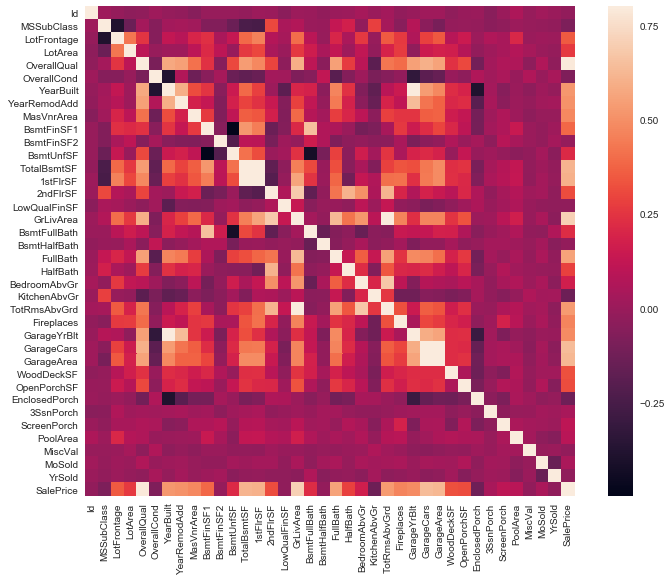

In [101]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

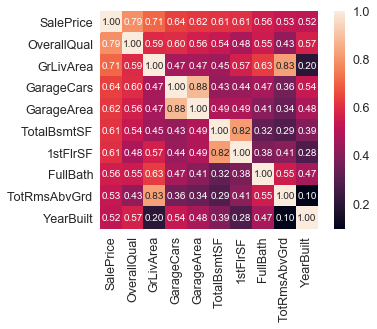

In [102]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

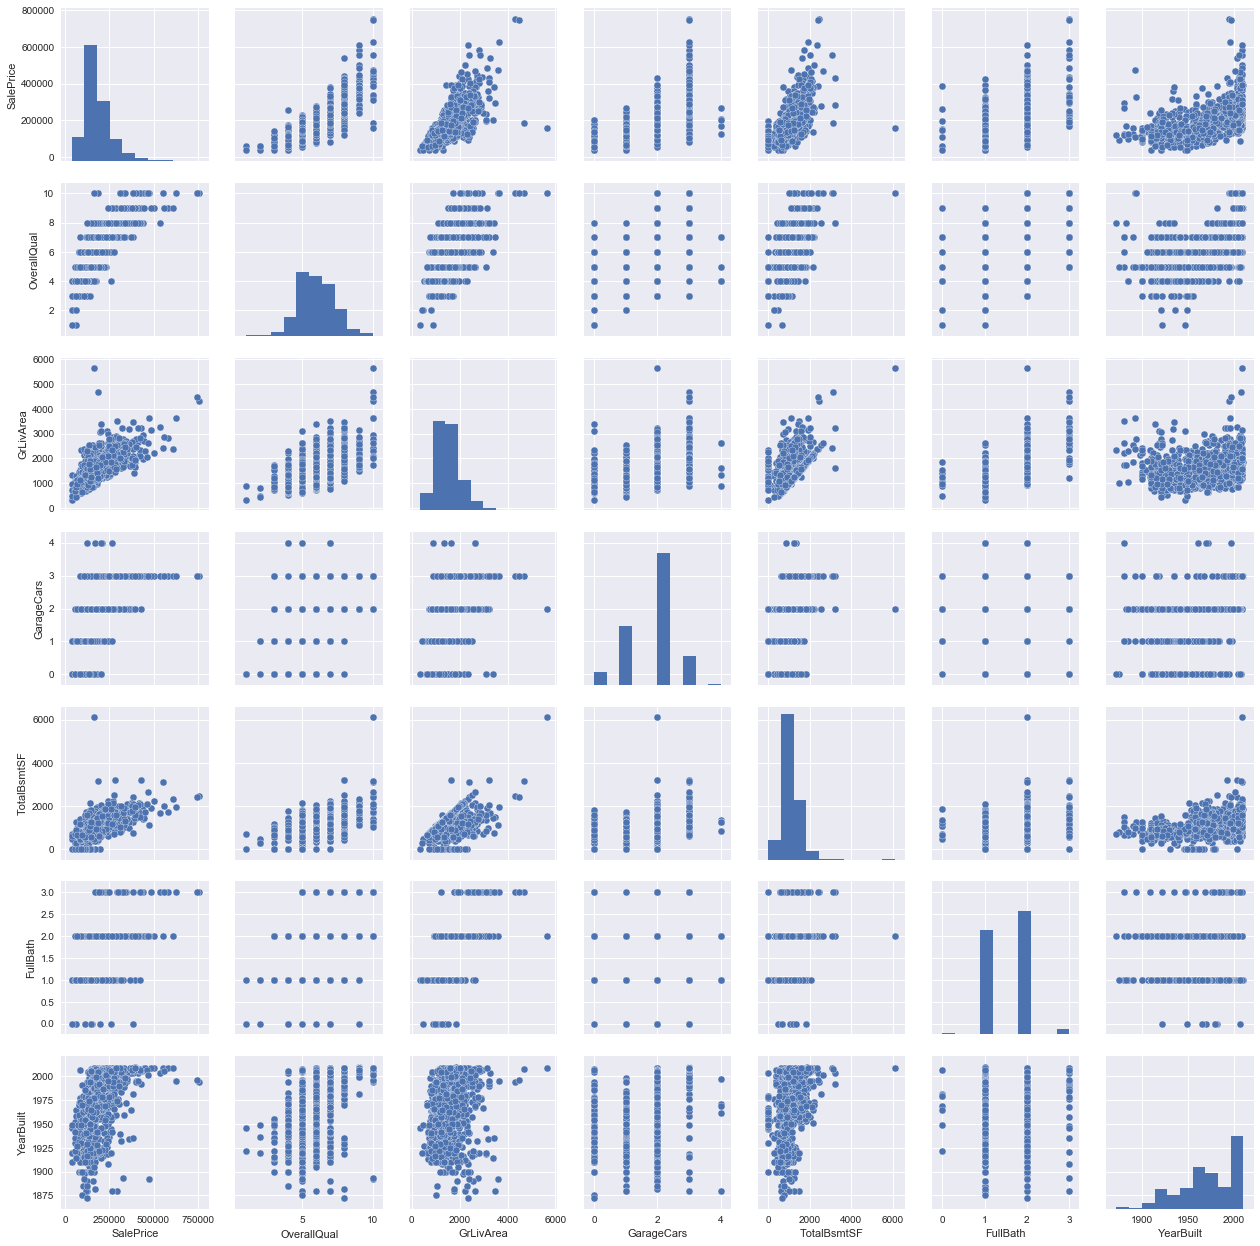

In [73]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [104]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [110]:
def deal_nan(df, missing_data):
    #dealing with missing data
    df = df.drop((missing_data[missing_data['Total'] > 200]).index,1)
    cols_obj, cols_val = [], []
    for col in df.columns:
        if df[col].dtype == 'float32' or df[col].dtype == 'int32':
            cols_val.append(col)
        else:
            cols_obj.append(col)
    df_val = df[cols_val].fillna(-1.0)
    df_obj = df[cols_obj].fillna('NaN')
    df = pd.concat([df_val, df_obj], axis = 1)
    if df.isnull().sum().max() == 0:
        return df
    else:
        raise ValueError("There are still nan values.")
    #df_train.isnull().sum()[df_train.isnull().sum() > 0] #just checking that there's no missing data missing...
df_train = deal_nan(df_train, missing_data)

In [81]:
#missing data in test dataset
df_test = pd.read_csv('test.csv')
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(34)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


There are much more missing data in test set than training set. Also, should we check the correlation before deleting them? Note that many columns with missing data are categorical, so we might keep the nan values after we figure out the correlation?

In [131]:
corrmat = df_train.corr()
k = 10 #number of variables for heatmap
picked_cols = list(corrmat.nlargest(k, 'SalePrice')['SalePrice'].index[1:])
picked_cols

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt']

In [116]:
def get_obj_cols(corrmat, df):
    val_col = set(corrmat.columns)
    obj_col = set(df.columns)
    for col in val_col:
        obj_col.remove(col)
    return list(obj_col)
obj_cols = get_obj_cols(corrmat, df_train)

In [126]:
def one_hot_encoding(df, obj_cols):
    df_obj = df[obj_cols]
    df_obj = pd.get_dummies(df_obj, drop_first = True)
    return df_obj
df_obj = one_hot_encoding(df_train, obj_cols)

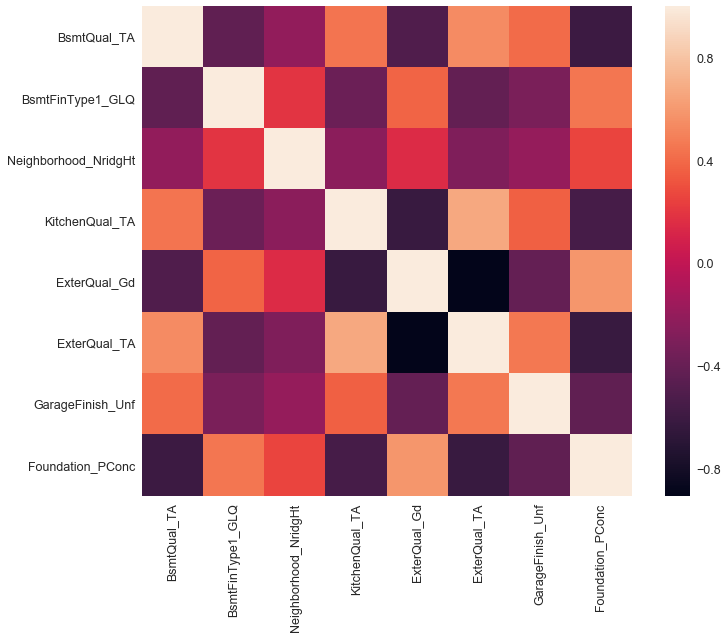

In [128]:
def corr_of_obj_cols(df_obj, df):
    cols = []
    for col in df_obj.columns:
        if df_obj[col].corr(df['SalePrice']) >= 0.4 or df_obj[col].corr(df['SalePrice']) <= -0.4:
            cols.append(col)
    corrmat = df_obj[cols].corr()
    f, ax = plt.subplots(figsize=(12, 9))
    sns.heatmap(corrmat, vmax=1., square=True)
    return list(corrmat.index)
obj_corr = corr_of_obj_cols(df_obj, df_train)

In [132]:
features = pd.concat([df_obj[obj_corr], df_train[picked_cols]], axis = 1)
label = df_train['SalePrice']